<a href="https://colab.research.google.com/github/vincent0104/CPE-019-CPE32S1/blob/main/Balintongog_Assignment_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission Details

Name: Balintongog, Vincent G. <br>
Course and Section: CPE 019-CPE32S1 <br>
Date of Submission: 23/06/2024 <br>
Instructor: Roman Richard <br>


# **PART 1** <br>
**Cifar10 dataset**

In [1]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
data=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale # x_train = x_train/ 255
x_test /= gray_scale

In [7]:
# Understand the structure of the dataset

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (50000, 32, 32, 3)
Target matrix: (10000, 32, 32, 3)
Feature matrix: (50000, 1)
Target matrix: (10000, 1)


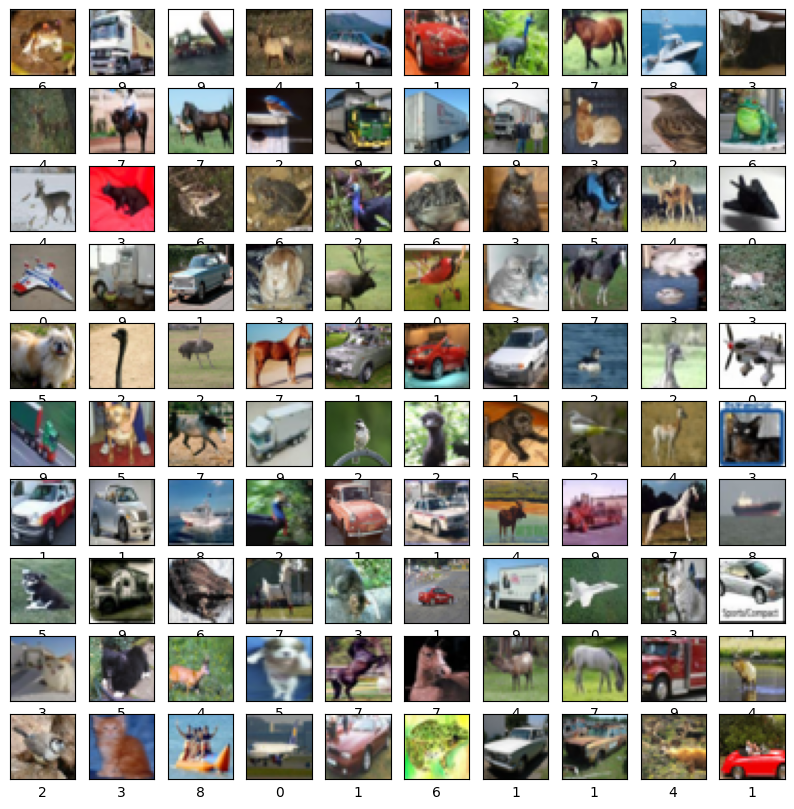

In [8]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i][0])

plt.show()


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 76s 47ms/step - loss: 1.5272 - accuracy: 0.4423 - val_loss: 1.2887 - val_accuracy: 0.5437
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1574 - accuracy: 0.5888 - val_loss: 1.1391 - val_accuracy: 0.5950
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0132 - accuracy: 0.6426 - val_loss: 1.0490 - val_accuracy: 0.6359
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9277 - accuracy: 0.6743 - val_loss: 0.9469 - val_accuracy: 0.6606
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8537 - accuracy: 0.7014 - val_loss: 0.9142 - val_accuracy: 0.6785
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7938 - accuracy: 0.7219 - val_loss: 0.9501 - val_accuracy: 0.6658
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7384 - accuracy: 0.7398 - val_loss: 0.9019 - val_accura

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

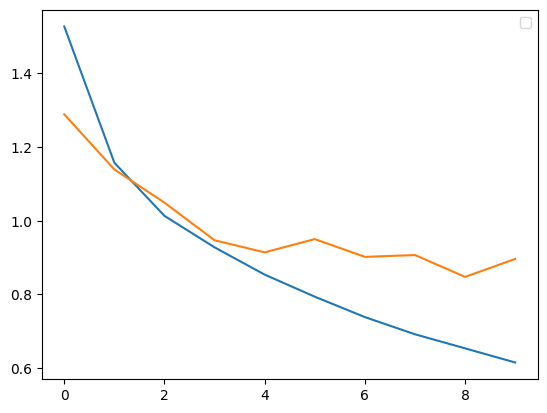

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

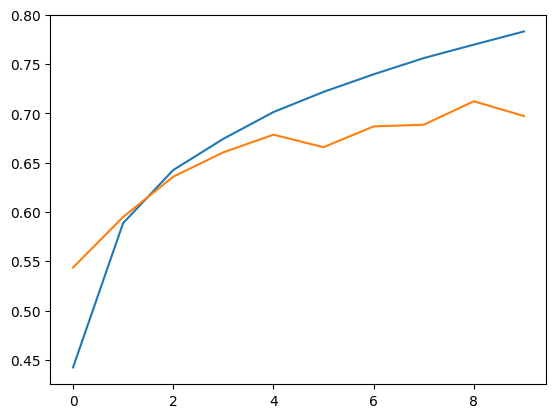

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [16]:
# Find the accuracy of the model

results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)

313/313 [==============================] - 5s 14ms/step - loss: 0.8963 - accuracy: 0.6974
test loss, test acc: [0.8962665796279907, 0.6973999738693237]


# **PART 2**
**Fashion MNIST dataset**

In [17]:
# importing modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [19]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [21]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
# Understand the structure of the dataset
print("Training dataset shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test dataset shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training dataset shape: (60000, 28, 28)
Training labels shape: (60000,)
Test dataset shape: (10000, 28, 28)
Test labels shape: (10000,)


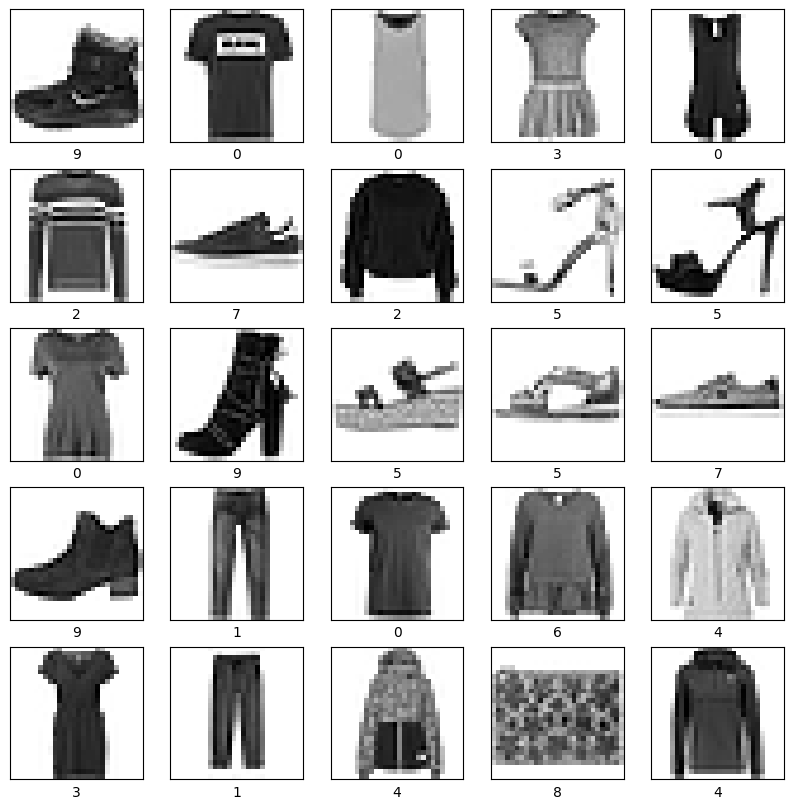

In [23]:
# Data visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [24]:
# Form the Input, hidden, and output layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.4973 - accuracy: 0.8167 - val_loss: 0.3982 - val_accuracy: 0.8558
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3205 - accuracy: 0.8827 - val_loss: 0.3384 - val_accuracy: 0.8743
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2767 - accuracy: 0.8989 - val_loss: 0.3100 - val_accuracy: 0.8908
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2462 - accuracy: 0.9083 - val_loss: 0.2745 - val_accuracy: 0.9002
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2215 - accuracy: 0.9185 - val_loss: 0.2621 - val_accuracy: 0.9039
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2013 - accuracy: 0.9244 - val_loss: 0.2786 - val_accuracy: 0.9040
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1849 - accuracy: 0.9306 - val_loss: 0.2620 -

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

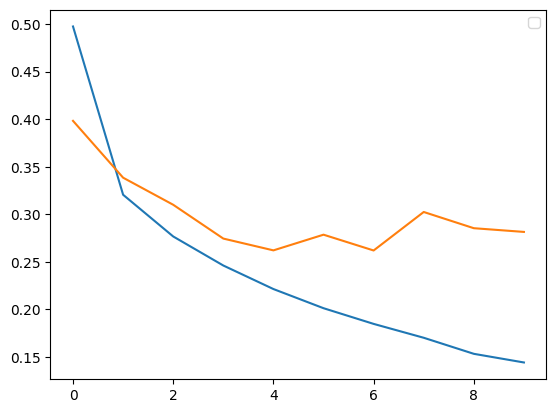

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

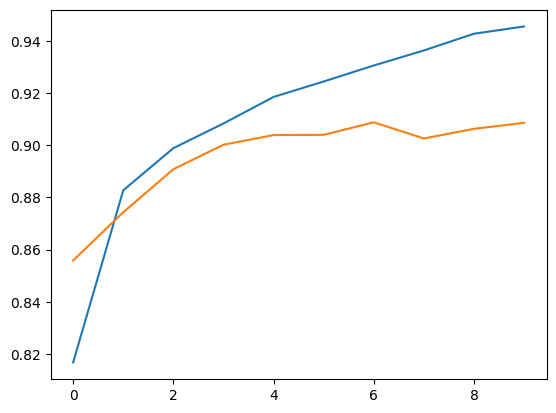

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [30]:
# Find the accuracy of the model

results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)

313/313 [==============================] - 4s 11ms/step - loss: 0.2815 - accuracy: 0.9086
test loss, test acc: [0.2814856171607971, 0.9085999727249146]


# Conclusion:

The problem that I am trying to solve is  classifying gratscale images of clothing items into 10 different catagories using the Fashion MNIST dataset. Using machine leaning to classify each items in the list for 10 categories. The Fashion MNIST dataset proves that it is a practical and challenging task for training machinge learning models, especially CNNs images classification. Using Fashion MNIST dataset serves as a good for benchmarking, offering various and relevant for pattern recognition.